In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [1]:
setwd('/import/DB/fel/BJTC-204')

In [2]:
load('./exp4.rda')

In [3]:
#exp4[,8:dim(exp4)[2]] = 2^exp4[,8:dim(exp4)[2]] -1

In [4]:
head(exp4)

,death,TYPE,PH,Gender,race,Age,GSM,NAT2,ADA,CDH2,...,HNRPDL,DMTF1,PPP4R1,CDH1,SLC12A6,ROD1,KCNE2,DGCR2,CASP8AP2,SCO2
,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431721,0,Control,6.97,M,Caucasian,32,GSM2431721,6.918508,5.958536,7.389671,...,8.062601,8.039051,6.266754,4.402844,6.107446,5.091350,7.473668,7.085446,5.301909,5.986224
GSM2431722,0,Control,7.01,F,Caucasian,63,GSM2431722,6.397328,6.113981,7.629390,...,9.066047,8.447141,6.887356,4.383695,5.726334,4.867468,7.710730,7.402328,5.598268,6.171961
GSM2431723,0,Control,NA,F,Caucasian,70,GSM2431723,6.814676,6.261580,7.571414,...,8.630200,8.170023,6.914393,4.441707,5.981377,4.979711,7.519356,7.314417,5.538427,5.854754
GSM2431726,0,Control,NA,M,Caucasian,71,GSM2431726,7.550068,6.640444,8.030948,...,6.794395,7.583125,6.374021,4.632824,6.542643,5.345686,8.181581,6.815460,5.552289,6.125526
GSM2431727,0,Control,6.87,M,Caucasian,44,GSM2431727,6.336289,6.297053,7.947093,...,9.055285,8.653470,6.902694,4.552302,5.629537,5.043913,7.322026,7.413795,5.617718,5.891519
GSM2431728,0,MDD,7.05,M,Caucasian,66,GSM2431728,6.266404,5.972297,7.826966,...,8.993547,8.454228,6.859039,4.488690,5.823510,4.932490,7.483323,7.521739,5.512290,6.347157


In [5]:
Type = exp4$TYPE

In [6]:
gene19 = read.table('./gene3639.res.txt',col.names = 'gene')

In [7]:
gene19

,gene
,<chr>
1,RSL1D1
2,F12
3,GNE
4,TRIAP1
5,HSPB11
6,CLPTM1
7,BAIAP3
8,SMARCD3
9,DBNDD1


In [8]:
expr = exp4[,gene19$gene]

In [9]:
y = ifelse(Type == 'Control',0,1)

In [10]:
y

[1] 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1
 [38] 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [75] 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
[112] 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0
[149] 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [11]:
colnames(expr) = gsub('-','.',colnames(expr))

In [12]:
expr <- expr[, !grepl("^\\d+", names(expr))]

In [13]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [14]:
x = as.matrix(expr)
y = y

In [15]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




In [16]:
set.seed(101)

In [17]:
rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)

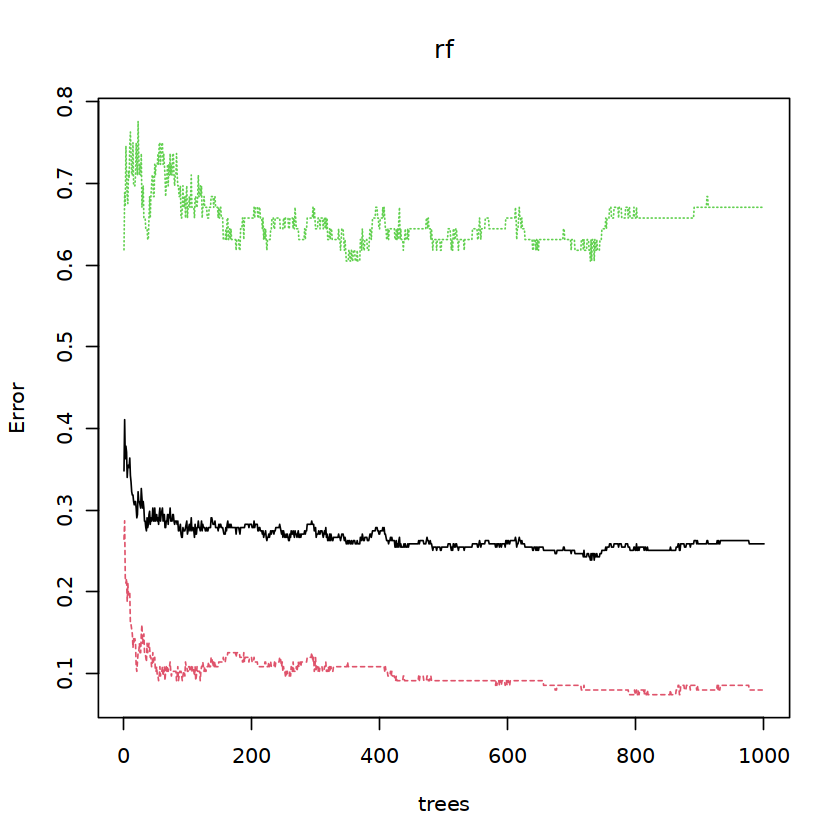

In [18]:
plot(rf)

In [19]:
pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

In [20]:
trees = which.min(rf$err.rate[,1])

In [21]:
rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

In [22]:
importance = importance(rf)

In [23]:
pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

png 
  2

In [24]:
# RPE65 + MC3R+NFIL3 + PRF1 + IL6

In [25]:
options(repr.plot.width = 4)

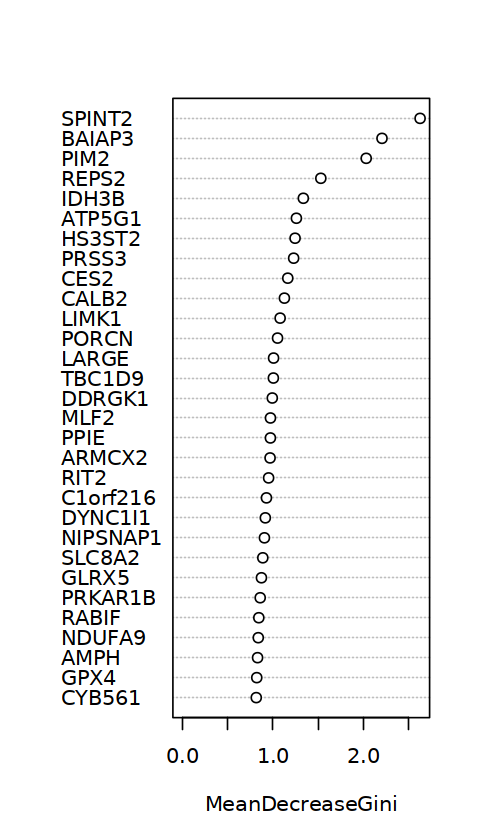

In [26]:
varImpPlot(rf,main = '')

In [27]:
rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

In [28]:
rfGenes

SPINT2    BAIAP3      PIM2     REPS2     IDH3B    ATP5G1    HS3ST2     PRSS3 
2.6252293 2.2045295 2.0300690 1.5287955 1.3355825 1.2589893 1.2444617 1.2286658 
     CES2     CALB2     LIMK1     PORCN     LARGE    TBC1D9    DDRGK1      MLF2 
1.1637348 1.1264941 1.0794040 1.0508004 1.0068408 1.0046797 0.9927172 0.9725718 
     PPIE    ARMCX2      RIT2  C1orf216   DYNC1I1  NIPSNAP1    SLC8A2     GLRX5 
0.9719423 0.9683523 0.9521342 0.9282868 0.9158818 0.9058486 0.8878831 0.8729450 
  PRKAR1B     RABIF    NDUFA9      AMPH      GPX4    CYB561    HSPB11  KIAA0284 
0.8592969 0.8438591 0.8378764 0.8301787 0.8210551 0.8157363 0.8106459 0.8105094 
    RIMS1     APEX1       ME3    DBNDD1    ROBLD3      SAE1     UBE2M   B4GALT3 
0.8016128 0.7971463 0.7887623 0.7854033 0.7850466 0.7691854 0.7671733 0.7669628 
    RUSC1     SFXN3      RALB     ERCC1      PAK6    RAD51C      TBR1    TRIAP1 
0.7618520 0.7617956 0.7578627 0.7564125 0.7528376 0.7505683 0.7363117 0.7314721 
     PID1     ASNA1 LOC729580   SMARCD3    SEZ6L2    KCNAB2     UCHL1      RBM9 
0.7287314 0.7192920 0.7134721 0.7129880 0.7125714 0.7030423 0.6978955 0.6958571 
    STMN4     AP1S1     CCKBR      DDA1     ANXA6    KCNAB1     TUBG2      BAP1 
0.6918156 0.6900727 0.6886408 0.6821696 0.6776108 0.6698433 0.6686808 0.6643505 
     POLS     GABRD    CLPTM1    ADORA1    NDUFB6     OLFM1       DBP    RSL1D1 
0.6551303 0.6542778 0.6526109 0.6460029 0.6426548 0.6401986 0.6330046 0.6300747 
   HPCAL4    ACTR10    BHLHB9     VTI1B   NEUROD6     GLRX2     PSME3  AURKAIP1 
0.6288055 0.6222733 0.6217933 0.6199083 0.6137267 0.6136416 0.6063347 0.6029208 
  GDAP1L1  C20orf24     DOC2A    GABRA5    NHP2L1    AKAP12     ITFG1       IDS 
0.5887283 0.5862488 0.5836954 0.5805692 0.5759515 0.5647049 0.5577931 0.5530621 
     MED6     CYTH2   NDUFAB1     WDR82  C18orf10    FBXL15      AACS    FBXO41 
0.5510481 0.5507170 0.5507134 0.5502032 0.5473934 0.5426897 0.5406243 0.5378143 
    PINK1     DCTN3    ELAVL4       F12    PPP3R1     NEDD8   ATP6V0C     G3BP2 
0.5376690 0.5363032 0.5317396 0.5310579 0.5310050 0.5286681 0.5263481 0.5207682 
   RABEPK   CIAPIN1     ACOT7     SIAH2  C12orf43      THY1    PTPRN2    TM6SF1 
0.5185919 0.5168454 0.5154757 0.5136055 0.5127491 0.5126186 0.5119235 0.5109175 
    PCSK1     EIF1B       RFK   ATP6V1A   D4S234E      PGK1    EEF1E1    CAMK1G 
0.5106813 0.5083171 0.5072231 0.5064216 0.5043959 0.5014579 0.5003728 0.4996854 
     GNG3   EPB41L1     NUAK1    MRPL46       GNE     DNM1L      PIN1      GOT1 
0.4937557 0.4867125 0.4853940 0.4819074 0.4750264 0.4744611 0.4711417 0.4649160 
   UQCRC1     PRPS1      DBN1     COX5A     ENDOG     CISD1     KCNJ9    RAD23A 
0.4627111 0.4625787 0.4622626 0.4600452 0.4578517 0.4525796 0.4472971 0.4472852 
    SMYD3    STOML1      POP7    ACTR1B     KCNK1     LYRM4     ICAM5      PPID 
0.4433131 0.4423091 0.4396816 0.4395632 0.4370269 0.4342560 0.4315221 0.4177208 
      PTS     COX7B     NDRG3      GNB5     BRP44      NBEA      MDH2     SKAP2 
0.4134190 0.4074793 0.4051789 0.4041908 0.3970493 0.3886480 0.3874766 0.3455696 
    SUMO3    ATP2B2 
0.3356470 0.2423944

In [29]:
# rfGenes=names(rfGenes[rfGenes>30]) 
# write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

# expr2 = exp4

# sigExp=expr2[rfGenes,]
# write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

# rfGenes

### svm

In [30]:
# library(tidyverse)
# library(glmnet)
# library(VennDiagram)
# library(e1071)
# library(caret)
# library(randomForest)

# x = as.matrix(expr)

# y=as.numeric(as.factor(Type))

# library(future)
# plan("multisession",workers=30)

# set.seed(1)
# rfeControl = rfeControl(functions = caretFuncs,
#                         method = "cv", # 默认自助法重采样 boot
#                         saveDetails = T, # 保存预测值和变量重要性
#                         number = 5, # 重抽样次数
#                         allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
#                         )

# Profile=rfe(x=x,y=as.factor(y),sizes =c(1:32),
#     rfeControl =  rfeControl,
#     methods="svmRadial")

# Profile

# pdf(file="SVM-RFE.pdf", width=6, height=5.5)
# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
# dev.off()

# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

# #输出
# featureGenes = Profile$optVariables
# write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

# featureGenes

### Boruta

In [31]:
library(Boruta)

In [32]:
# x = as.matrix(expr)
y = ifelse(Type == 'Control',0,1)

In [33]:
y

[1] 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1
 [38] 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [75] 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
[112] 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0
[149] 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [34]:
set.seed(111)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

In [35]:
boruta

Boruta performed 299 iterations in 17.82289 secs.
 15 attributes confirmed important: ATP5G1, BAIAP3, CALB2, DYNC1I1,
IDH3B and 10 more;
 132 attributes confirmed unimportant: AACS, ACOT7, ACTR10, ACTR1B,
ADORA1 and 127 more;
 7 tentative attributes left: CES2, EIF1B, KCNAB1, NIPSNAP1, PGK1 and 2
more;

In [36]:
table(boruta$finalDecision)


Tentative Confirmed  Rejected 
        7        15       132 

In [37]:
boruta$finalDecision

RSL1D1       F12       GNE    TRIAP1    HSPB11    CLPTM1    BAIAP3   SMARCD3 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected Confirmed  Rejected 
   DBNDD1      AACS     WDR82      PAK6     ICAM5    HPCAL4    CAMK1G      POP7 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
   MRPL46    ROBLD3      CES2      PIM2    STOML1      BAP1       DBP      PPID 
 Rejected  Rejected Tentative Confirmed  Rejected  Rejected  Rejected  Rejected 
   CYB561    FBXO41      POLS   NEUROD6  AURKAIP1      RBM9    EEF1E1      MLF2 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
    GLRX2     PCSK1    RAD23A     ENDOG    ELAVL4     LIMK1     NUAK1     ERCC1 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
 KIAA0284  C1orf216      RALB     UBE2M     SMYD3     PINK1     APEX1  C20orf24 
Confirmed  Rejected Confirmed Tentative  Rejected  Rejected  Rejected  Rejected 
 C18orf10  C12orf43  NIPSNAP1     EIF1B     GLRX5     DCTN3     IDH3B      GOT1 
 Rejected  Rejected Tentative Tentative  Rejected  Rejected Confirmed  Rejected 
   HS3ST2    NDUFB6     UCHL1     SKAP2     SFXN3     SIAH2     VTI1B     CISD1 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
  ATP6V0C    TM6SF1      NBEA      PID1       RFK   ATP6V1A     DNM1L      GNB5 
 Rejected  Rejected  Rejected Confirmed  Rejected  Rejected  Rejected  Rejected 
    CYTH2   PRKAR1B      MDH2      DBN1     PRPS1     AP1S1     PRSS3     REPS2 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected Tentative Confirmed 
  D4S234E   CIAPIN1     G3BP2       ME3    RABEPK     NDRG3   NDUFAB1      PGK1 
 Rejected  Rejected  Rejected Confirmed  Rejected  Rejected  Rejected Tentative 
      PTS     PORCN     ACOT7      AMPH      THY1     CALB2    ADORA1     COX5A 
 Rejected  Rejected  Rejected  Rejected  Rejected Confirmed  Rejected  Rejected 
    COX7B   DYNC1I1     DOC2A      RIT2      TBR1    NDUFA9      PIN1     RIMS1 
 Rejected Confirmed  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
   SEZ6L2     RUSC1      GPX4     SUMO3    SLC8A2     RABIF   EPB41L1    BHLHB9 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
   SPINT2     ANXA6    UQCRC1     LARGE     TUBG2   GDAP1L1    KCNAB1     ITFG1 
Confirmed  Rejected  Rejected Confirmed  Rejected  Rejected Tentative  Rejected 
   GABRA5    RAD51C     ASNA1    ACTR1B      PPIE    ACTR10    ARMCX2     LYRM4 
 Rejected  Rejected  Rejected  Rejected Confirmed  Rejected  Rejected  Rejected 
   TBC1D9      MED6    DDRGK1    PTPRN2     NEDD8    ATP5G1    KCNAB2    ATP2B2 
Confirmed  Rejected  Rejected  Rejected  Rejected Confirmed  Rejected  Rejected 
    PSME3 LOC729580     OLFM1    AKAP12      SAE1     STMN4      DDA1    PPP3R1 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
    CCKBR       IDS     GABRD     BRP44   B4GALT3     KCNJ9    NHP2L1      GNG3 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
    KCNK1    FBXL15 
 Rejected  Rejected 
Levels: Tentative Confirmed Rejected

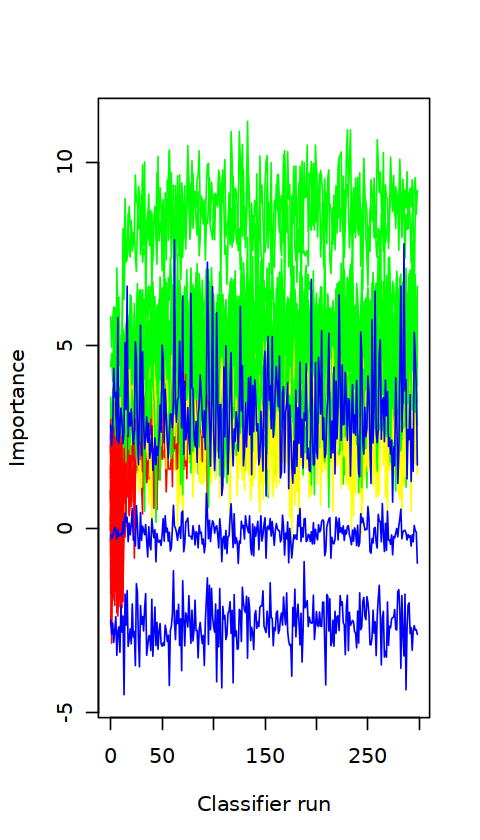

In [38]:
Boruta::plotImpHistory(boruta)

In [39]:
library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


In [40]:
boruta

Boruta performed 299 iterations in 17.82289 secs.
 15 attributes confirmed important: ATP5G1, BAIAP3, CALB2, DYNC1I1,
IDH3B and 10 more;
 132 attributes confirmed unimportant: AACS, ACOT7, ACTR10, ACTR1B,
ADORA1 and 127 more;
 7 tentative attributes left: CES2, EIF1B, KCNAB1, NIPSNAP1, PGK1 and 2
more;

Welcome to YSX package which is a collection of useful scripts.
This package does not require you install all depended packages, since one may not need all functions in this package.
However, when there is a message implying some functions are missing,please install these packages manually.
Or more specially, check Plot.Rmd in vignettes first.




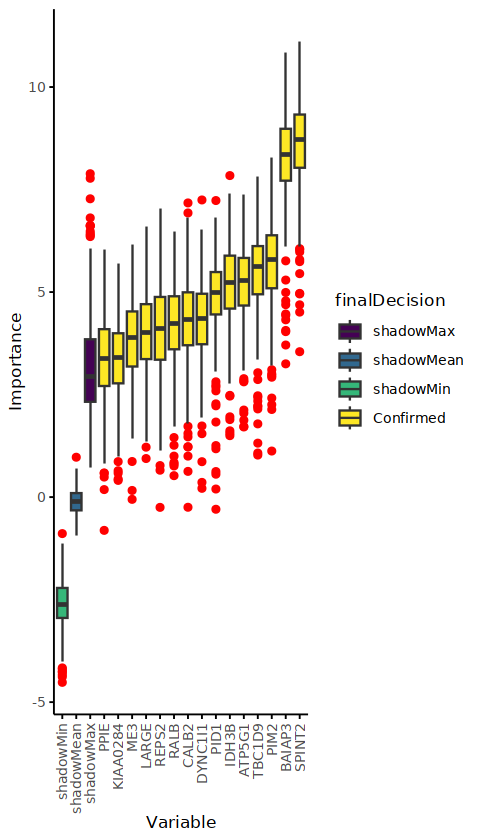

In [41]:
library(YSX)

sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
           legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
           xtics_angle = 90)

In [42]:
expr = cbind(Type,expr)

In [43]:
colnames(expr)[1]  ='Group'

In [44]:
expr3 = expr

In [45]:
set.seed(147)  
index <-  which( (1:nrow(expr3))%%3 == 0 )
train <- expr3[-index,]
test <- expr3[index,]

In [46]:
table(test$Group)


Control     MDD 
     57      26 

In [47]:
library("xgboost")
library("Matrix")
train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)


Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice


Warning message:
"package 'Matrix' was built under R version 4.2.3"


In [48]:
train_label <- as.numeric(train$Group == 'MDD')
test_label <-  as.numeric(test$Group == 'MDD')
all_label <-  as.numeric(expr3$Group == 'MDD')

In [49]:
all_label

[1] 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1
 [38] 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [75] 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
[112] 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0
[149] 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [50]:
train_fin <- list(data=train_matrix,label=train_label) 
test_fin <- list(data=test_matrix,label=test_label) 
all_fin <- list(data=all_matrix,label=all_label) 

dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

In [51]:
xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
  objective='binary:logistic', nround=25)

[1]	train-logloss:0.455379 
[2]	train-logloss:0.349227 
[3]	train-logloss:0.262329 
[4]	train-logloss:0.212544 
[5]	train-logloss:0.170343 
[6]	train-logloss:0.138143 
[7]	train-logloss:0.115019 
[8]	train-logloss:0.098201 
[9]	train-logloss:0.084232 
[10]	train-logloss:0.073151 
[11]	train-logloss:0.064411 
[12]	train-logloss:0.057454 
[13]	train-logloss:0.052596 
[14]	train-logloss:0.048264 
[15]	train-logloss:0.044190 
[16]	train-logloss:0.041825 
[17]	train-logloss:0.038688 
[18]	train-logloss:0.036754 
[19]	train-logloss:0.034753 
[20]	train-logloss:0.033030 
[21]	train-logloss:0.031367 
[22]	train-logloss:0.029559 
[23]	train-logloss:0.028314 
[24]	train-logloss:0.027306 
[25]	train-logloss:0.026341 


In [52]:
xgb

##### xgb.Booster
raw: 34.8 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max_depth = 6, eta = 0.5, objective = "binary:logistic")
params (as set within xgb.train):
  max_depth = "6", eta = "0.5", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 154 
niter: 25
nfeatures : 154 
evaluation_log:
    iter train_logloss
       1    0.45537853
       2    0.34922717
---                   
      24    0.02730644
      25    0.02634132

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
SPINT2,0.11492466,0.05871019,0.014354067
BAIAP3,0.06838900,0.06435563,0.047846890
HPCAL4,0.04923720,0.02379996,0.019138756
HS3ST2,0.04468440,0.05377985,0.028708134
CALB2,0.03550072,0.02905974,0.009569378
TBR1,0.03422975,0.02364427,0.004784689


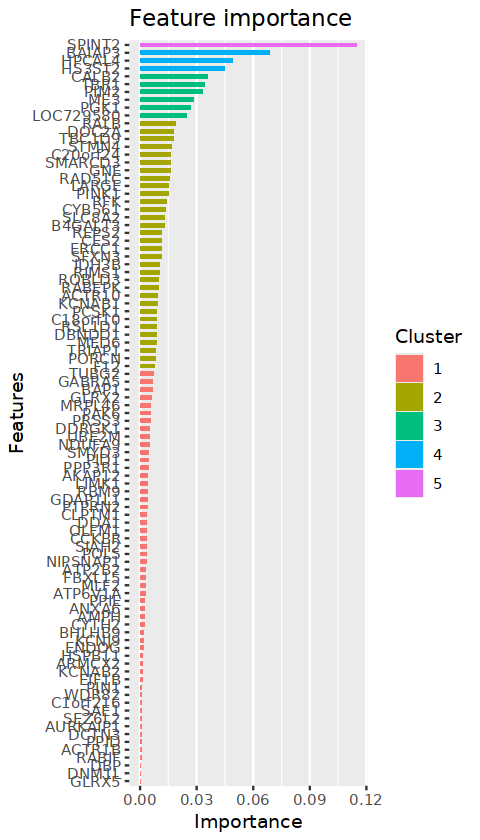

In [53]:
importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
head(importance)
xgb.ggplot.importance(importance)

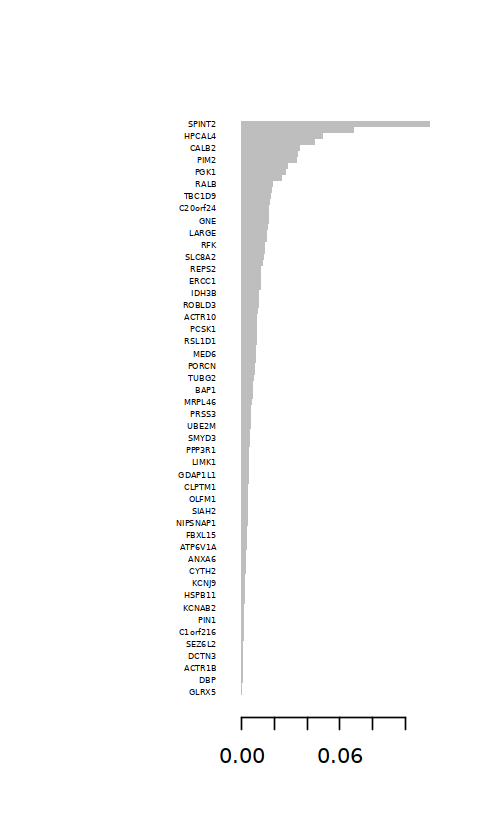

In [54]:
xgb.plot.importance(importance)

In [55]:
# lasso

In [56]:
library(lars) 
library(glmnet) 

Warning message:
"package 'lars' was built under R version 4.2.3"
Loaded lars 1.3


Warning message:
"package 'glmnet' was built under R version 4.2.3"
Loaded glmnet 4.1-8



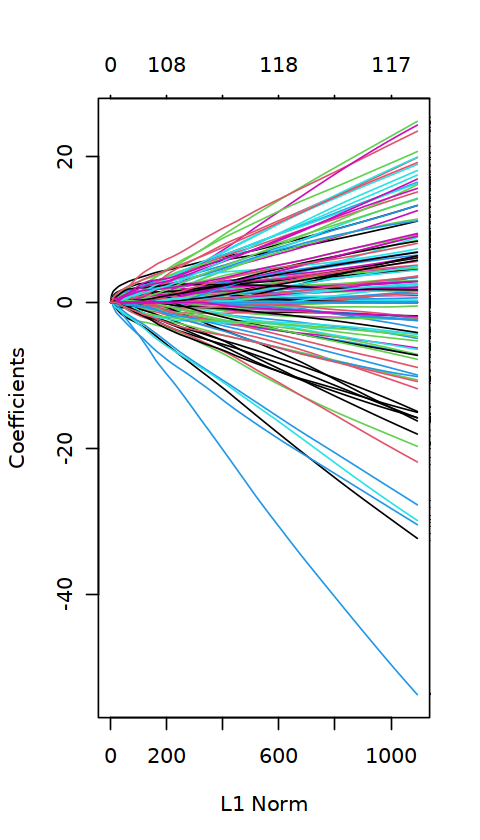

In [57]:
#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=100, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

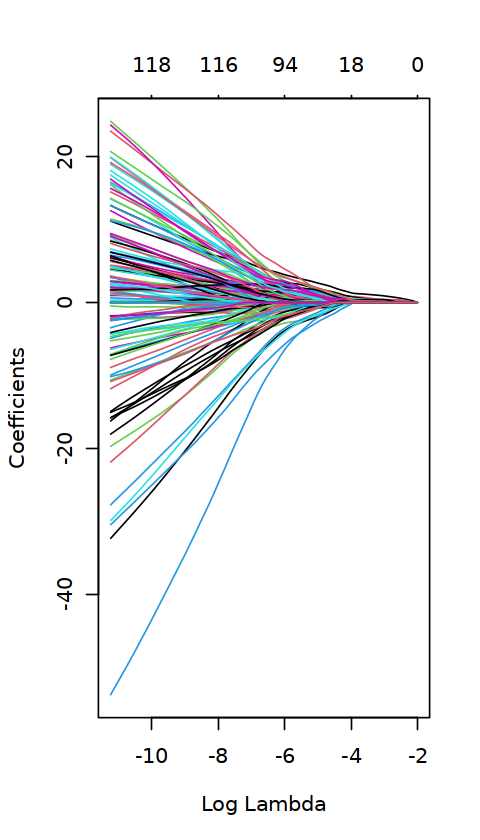

In [58]:
plot(model_lasso, xvar="lambda", label=TRUE)

In [59]:
cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)

[1] 0.02487135 0.10040605

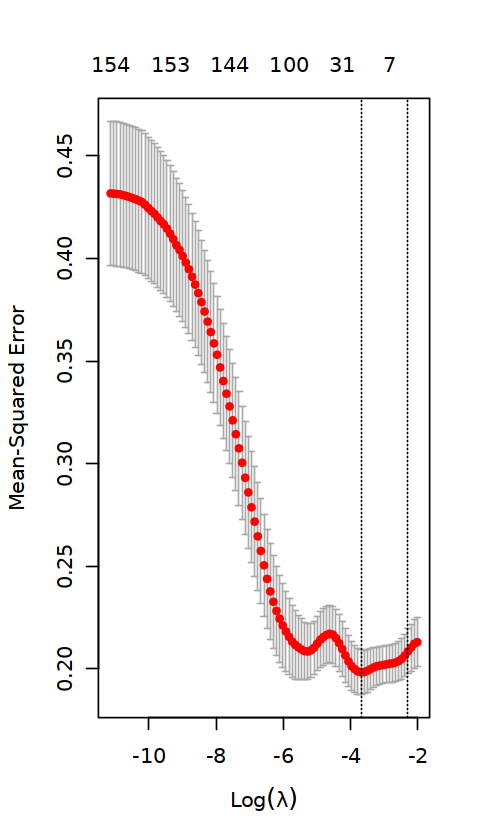

In [60]:
plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

In [61]:
model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.min	)
gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
gene_1se = gsub('[.]',' ',gene_1se)

In [62]:
gene_1se

[1] "BAIAP3"   "PIM2"     "CYB561"   "ERCC1"    "NIPSNAP1" "PID1"    
 [7] "PRSS3"    "REPS2"    "CALB2"    "PPIE"     "TBC1D9"   "AKAP12"  
[13] "STMN4"

### 韦恩图

In [63]:
importance$Feature

[1] "SPINT2"    "BAIAP3"    "HPCAL4"    "HS3ST2"    "CALB2"     "TBR1"     
 [7] "PIM2"      "ME3"       "PGK1"      "LOC729580" "RALB"      "DOC2A"    
[13] "TBC1D9"    "STMN4"     "C20orf24"  "SMARCD3"   "GNE"       "RAD51C"   
[19] "LARGE"     "PINK1"     "RFK"       "CYB561"    "SLC8A2"    "B4GALT3"  
[25] "REPS2"     "CES2"      "ERCC1"     "SFXN3"     "IDH3B"     "RIMS1"    
[31] "ROBLD3"    "RABEPK"    "ACTR10"    "KCNAB1"    "PCSK1"     "C18orf10" 
[37] "RSL1D1"    "DBNDD1"    "MED6"      "TRIAP1"    "PORCN"     "F12"      
[43] "TUBG2"     "GABRA5"    "BAP1"      "GLRX2"     "MRPL46"    "PAK6"     
[49] "PRSS3"     "DDRGK1"    "UBE2M"     "NDUFA9"    "SMYD3"     "PID1"     
[55] "PPP3R1"    "AKAP12"    "LIMK1"     "RBM9"      "GDAP1L1"   "PTPRN2"   
[61] "CLPTM1"    "DDA1"      "OLFM1"     "CCKBR"     "SIAH2"     "POLS"     
[67] "NIPSNAP1"  "ATP2B2"    "FBXL15"    "MLF2"      "ATP6V1A"   "PPIE"     
[73] "ANXA6"     "AMPH"      "CYTH2"     "BHLHB9"    "KCNJ9"     "ENDOG"    
[79] "HSPB11"    "ARMCX2"    "KCNAB2"    "EIF1B"     "PIN1"      "WDR82"    
[85] "C1orf216"  "SAE1"      "SEZ6L2"    "AURKAIP1"  "DCTN3"     "PPID"     
[91] "ACTR1B"    "RABIF"     "DBP"       "DNM1L"     "GLRX5"

In [64]:
RF.gene = names(rfGenes)[1:10]
#SVF.RFE.gene = featureGenes
XGBoost.gene = importance$Feature[1:10]

In [65]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()

In [66]:
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [67]:
lasso.gene  = gene_1se

In [68]:
list1 = list(RF.gene,lasso.gene,Boruta.gene,XGBoost.gene)

In [69]:
data =  as.data.frame (do.call (cbind, list1))

Warning message in (function (..., deparse.level = 1) :
"number of rows of result is not a multiple of vector length (arg 1)"


In [70]:

library(venn)
        library(VennDiagram)
        color=c( "#3C5488B2","#00A087B2", 
             "#F39B7FB2","#91D1C2B2", 
             "#8491B4B2", "#DC0000B2", 
             "#7E6148B2","yellow", 
             "darkolivegreen1", "lightskyblue", 
             "darkgreen", "deeppink", "khaki2", 
             "firebrick", "brown1", "darkorange1", 
             "cyan1", "royalblue4", "darksalmon", 
             "darkgoldenrod1", "darkseagreen", "darkorchid")

    if (ncol(data) == 2){
        sample_list <- list(c1 = data[,1], c2 = data[,2])
    }else if(ncol(data) == 3){
        sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
    }else if(ncol(data) == 4){
        sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
    }else{
        sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
    }
    
    q <- venn.diagram(sample_list,filename = NULL,
             fill = color[1:(length(sample_list))],
             alpha = 0.50, cat.col = rep('black', ncol(data)), 
             col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
                             )
    pdf(paste0('./',"venn.pdf"))
    grid.draw(q)
    dev.off()

Warning message:
"package 'venn' was built under R version 4.2.3"
Loading required package: grid

Loading required package: futile.logger

Warning message:
"package 'futile.logger' was built under R version 4.2.3"


png 
  2

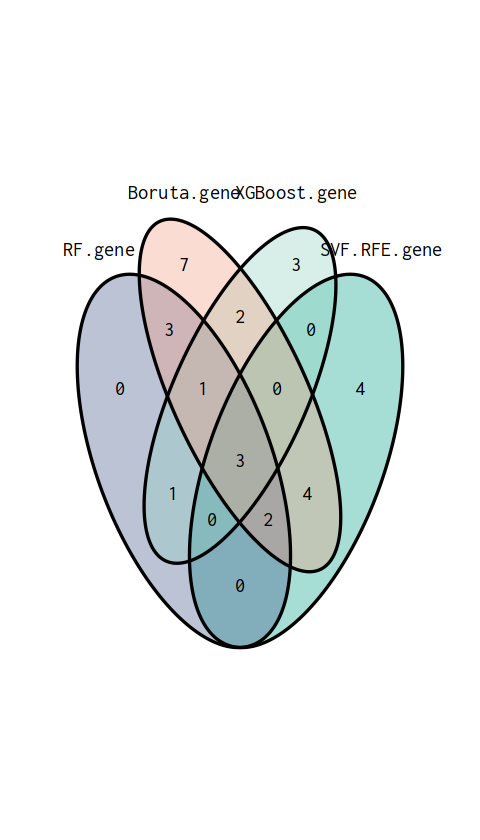

In [71]:
grid.draw(q)

In [72]:
intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),lasso.gene)

[1] "BAIAP3" "PIM2"   "CALB2"

In [73]:
model.gene = intersect(lasso.gene,XGBoost.gene)

In [74]:
model.gene  =lasso.gene

In [75]:
model.gene

[1] "BAIAP3"   "PIM2"     "CYB561"   "ERCC1"    "NIPSNAP1" "PID1"    
 [7] "PRSS3"    "REPS2"    "CALB2"    "PPIE"     "TBC1D9"   "AKAP12"  
[13] "STMN4"

In [76]:
set.seed(1234)

In [77]:
expr3 = expr

In [78]:
expr3[expr3$Group =='MDD',]$Group<-1

In [79]:

expr3[expr3$Group =='Control',]$Group<-0
expr3$Group = as.numeric(expr3$Group)

In [80]:
table(Type)

Type
Control     MDD 
    175      76 

In [81]:
expr4 = expr3 %>% dplyr::select(c(Group,model.gene))

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
i Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(model.gene)

  # Now:
  data %>% select(all_of(model.gene))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."


In [82]:
dim(expr4)

[1] 251  14

In [83]:
head(expr4,7)

,Group,BAIAP3,PIM2,CYB561,ERCC1,NIPSNAP1,PID1,PRSS3,REPS2,CALB2,PPIE,TBC1D9,AKAP12,STMN4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431721,0,6.863213,7.588483,6.872094,7.778981,8.792379,6.073907,7.752138,5.751384,7.078258,5.822218,7.972278,8.500833,8.674346
GSM2431722,0,7.550737,7.978999,7.432490,7.664906,8.616012,6.586255,7.895105,6.206820,6.639872,6.090770,7.892465,9.170135,9.956186
GSM2431723,0,8.075324,7.525003,6.816240,7.459427,8.621639,6.213135,7.105839,5.841415,6.994082,6.062111,7.283479,8.931642,9.196385
GSM2431726,0,6.961966,7.762745,6.775769,7.827708,8.584055,5.802464,7.969423,5.895241,6.799332,5.799366,6.906822,8.215576,7.938526
GSM2431727,0,8.078242,7.608265,7.077335,7.932656,9.220082,6.299679,7.868202,5.752709,6.958070,6.421781,7.842674,9.058458,9.446062
GSM2431728,1,8.105647,7.950218,7.159312,7.883835,9.038041,6.946103,8.225899,6.188171,6.884759,6.258949,8.133748,9.164671,9.478361
GSM2431731,1,7.706888,7.015011,6.973399,7.549351,8.525040,6.849141,7.462840,5.740495,6.545765,6.082287,8.032900,9.372205,9.394061


In [84]:
# library(caret)
# library(ggplot2)

#  a = c()
# # 
# for (i in model.gene){
#     res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
#          ci=TRUE, # 显示95%CI
#          #percent=TRUE, # 是否需要以百分比显示
#          smooth=FALSE,# 是否平滑曲线
#          levels=c(0,1),direction="<" #设置分组方向
#          )
#     if (res$auc > 0.5){
#         a = append(a,i)
#         print(paste0(i,' ',res$auc))
#         p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
#   geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
#   theme_bw() + # 设置背景
#   ggtitle(paste0(i," ROC Curve"))+
#   theme(plot.title = element_text(hjust = 0.5,size = 16),
#         axis.text=element_text(size=12,colour = "black"),
#         axis.title.x = element_text(size = 14),
#         axis.title.y = element_text(size = 14))
# p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
#   annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
#     ggsave(file = paste0(i,'.ROC.pdf'))
# }else{
        
# }

    
#     }

### 批量单因素逻辑回归

In [85]:
#expr4 = expr3

In [86]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

varsU<-names(expr4[,2:dim(expr4)[2]])

Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Result

Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

Uni_log[tzgene,]

### 多因素分析

tzgene

data = expr4[,c('Group',tzgene)]

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: Hmisc

Warning message:
"package 'Hmisc' was built under R version 4.2.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:plyr':

    is.discrete, summarize


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


Loading required package: foreign

Warning message:
"package 'foreign' was built under R version 4.2.3"
Loading requi

,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BAIAP3,2.1173757,0.4817660,4.395030,1.107576e-05,8.309303,3.339607,22.206853,BAIAP3
PIM2,1.1286176,0.3594067,3.140224,1.688188e-03,3.091380,1.545333,6.354154,PIM2
CYB561,1.6751983,0.6393061,2.620338,8.784258e-03,5.339854,1.546143,19.150660,CYB561
ERCC1,2.3551297,0.6860296,3.432986,5.969738e-04,10.539495,2.853004,42.449462,ERCC1
NIPSNAP1,2.9279697,0.7258677,4.033751,5.489344e-05,18.689646,4.693738,81.504823,NIPSNAP1
PID1,0.7408530,0.2470851,2.998372,2.714259e-03,2.097724,1.301147,3.437307,PID1
PRSS3,1.0723466,0.2770224,3.870974,1.084013e-04,2.922229,1.730658,5.152145,PRSS3
REPS2,1.7233102,0.5948009,2.897289,3.764023e-03,5.603045,1.786119,18.529846,REPS2
CALB2,1.3161144,0.4220409,3.118452,1.818036e-03,3.728904,1.658300,8.721296,CALB2


,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BAIAP3,2.1173757,1.107576e-05,8.309303,3.339607,22.206853,BAIAP3
PIM2,1.1286176,1.688188e-03,3.091380,1.545333,6.354154,PIM2
CYB561,1.6751983,8.784258e-03,5.339854,1.546143,19.150660,CYB561
ERCC1,2.3551297,5.969738e-04,10.539495,2.853004,42.449462,ERCC1
NIPSNAP1,2.9279697,5.489344e-05,18.689646,4.693738,81.504823,NIPSNAP1
PID1,0.7408530,2.714259e-03,2.097724,1.301147,3.437307,PID1
PRSS3,1.0723466,1.084013e-04,2.922229,1.730658,5.152145,PRSS3
REPS2,1.7233102,3.764023e-03,5.603045,1.786119,18.529846,REPS2
CALB2,1.3161144,1.818036e-03,3.728904,1.658300,8.721296,CALB2


[1] "BAIAP3"   "PIM2"     "CYB561"   "ERCC1"    "NIPSNAP1" "PID1"    
 [7] "PRSS3"    "REPS2"    "CALB2"    "PPIE"     "TBC1D9"   "AKAP12"  
[13] "STMN4"

In [87]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9386  -0.7779  -0.4773   0.8492   2.6441  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -63.21755   12.41769  -5.091 3.56e-07 ***
BAIAP3        1.62753    0.59997   2.713  0.00667 ** 
PIM2          1.22002    0.64539   1.890  0.05871 .  
CYB561        1.30245    0.98142   1.327  0.18448    
ERCC1         0.63504    0.96503   0.658  0.51051    
NIPSNAP1     -0.40165    1.10680  -0.363  0.71668    
PID1          0.08604    0.53980   0.159  0.87336    
PRSS3         0.49828    0.38273   1.302  0.19294    
REPS2         0.96474    0.93002   1.037  0.29958    
CALB2         0.38545    0.60991   0.632  0.52740    
PPIE          0.77271    1.05292   0.734  0.46302    
TBC1D9        0.37101    0.89015   0.417  0.67682    
AKAP12        0.46504    0.59466   0.782  0.43420    
STMN4         0.54018    0.50674   1.066  0.28643

Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-63.218,25.918,0(0~0),<0.001
BAIAP3,1.628,7.359,5.091(1.62~17.211),0.007
PIM2,1.220,3.573,3.387(0.969~12.34),0.059
CYB561,1.302,1.761,3.678(0.543~25.946),0.184
ERCC1,0.635,0.433,1.887(0.278~12.552),0.511
NIPSNAP1,-0.402,0.132,0.669(0.075~5.903),0.717
PID1,0.086,0.025,1.09(0.376~3.153),0.873
PRSS3,0.498,1.695,1.646(0.779~3.524),0.193
REPS2,0.965,1.076,2.624(0.431~16.828),0.300


In [88]:
fit.reduce<-glm(Group~. ,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9386  -0.7779  -0.4773   0.8492   2.6441  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -63.21755   12.41769  -5.091 3.56e-07 ***
BAIAP3        1.62753    0.59997   2.713  0.00667 ** 
PIM2          1.22002    0.64539   1.890  0.05871 .  
CYB561        1.30245    0.98142   1.327  0.18448    
ERCC1         0.63504    0.96503   0.658  0.51051    
NIPSNAP1     -0.40165    1.10680  -0.363  0.71668    
PID1          0.08604    0.53980   0.159  0.87336    
PRSS3         0.49828    0.38273   1.302  0.19294    
REPS2         0.96474    0.93002   1.037  0.29958    
CALB2         0.38545    0.60991   0.632  0.52740    
PPIE          0.77271    1.05292   0.734  0.46302    
TBC1D9        0.37101    0.89015   0.417  0.67682    
AKAP12        0.46504    0.59466   0.782  0.43420    
STMN4         0.54018    0.50674   1.066  0.28643

In [89]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=274.94
Group ~ BAIAP3 + PIM2 + CYB561 + ERCC1 + NIPSNAP1 + PID1 + PRSS3 + 
    REPS2 + CALB2 + PPIE + TBC1D9 + AKAP12 + STMN4

           Df Deviance    AIC
- PID1      1   246.97 272.97
- NIPSNAP1  1   247.07 273.07
- TBC1D9    1   247.12 273.12
- CALB2     1   247.34 273.34
- ERCC1     1   247.37 273.37
- PPIE      1   247.48 273.48
- AKAP12    1   247.56 273.56
- REPS2     1   248.03 274.03
- STMN4     1   248.10 274.10
- PRSS3     1   248.65 274.65
- CYB561    1   248.72 274.72
<none>          246.94 274.94
- PIM2      1   250.59 276.59
- BAIAP3    1   254.83 280.83

Step:  AIC=272.97
Group ~ BAIAP3 + PIM2 + CYB561 + ERCC1 + NIPSNAP1 + PRSS3 + REPS2 + 
    CALB2 + PPIE + TBC1D9 + AKAP12 + STMN4

           Df Deviance    AIC
- NIPSNAP1  1   247.15 271.15
- TBC1D9    1   247.22 271.22
- CALB2     1   247.39 271.39
- ERCC1     1   247.49 271.49
- PPIE      1   247.65 271.65
- AKAP12    1   247.77 271.77
- REPS2     1   248.05 272.05
- STMN4     1   248.19 272.19
- CYB561 


Call:
glm(formula = Group ~ BAIAP3 + PIM2 + CYB561 + PRSS3 + AKAP12, 
    family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7097  -0.7793  -0.5251   0.8778   2.7159  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -53.5484     9.1098  -5.878 4.15e-09 ***
BAIAP3        1.5848     0.5528   2.867  0.00415 ** 
PIM2          1.4928     0.4732   3.155  0.00161 ** 
CYB561        1.8375     0.7880   2.332  0.01972 *  
PRSS3         0.6777     0.3067   2.210  0.02714 *  
AKAP12        1.1731     0.3920   2.992  0.00277 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 307.83  on 250  degrees of freedom
Residual deviance: 253.03  on 245  degrees of freedom
AIC: 265.03

Number of Fisher Scoring iterations: 5


In [90]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-53.548,34.552,0(0~0),<0.001
BAIAP3,1.585,8.218,4.879(1.701~14.993),0.004
PIM2,1.493,9.953,4.449(1.798~11.589),0.002
CYB561,1.837,5.437,6.281(1.374~30.55),0.020
PRSS3,0.678,4.882,1.969(1.085~3.639),0.027
AKAP12,1.173,8.954,3.232(1.54~7.187),0.003


In [91]:
b = rownames(formatFit(logit.step))[2:length(rownames(formatFit(logit.step)))]

Waiting for profiling to be done...

Waiting for profiling to be done...



In [92]:
save(b,file = 'b.rda')

In [93]:
data = data[,c('Group',b)]

In [94]:
library(autoReg)


Attaching package: 'autoReg'


The following object is masked from 'package:MASS':

    select




In [95]:
overall.log =  glm(Group~.,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

name,desc,0 (N=175),1 (N=76),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BAIAP3,Mean <U+00B1> SD,7.8 <U+00B1> 0.3,8.0 <U+00B1> 0.3,BAIAP3,"8.31 (3.23-21.36, p<.001)","4.88 (1.65-14.42, p=.004)"
PIM2,Mean <U+00B1> SD,7.6 <U+00B1> 0.4,7.8 <U+00B1> 0.4,PIM2,"3.09 (1.53-6.25, p=.002)","4.45 (1.76-11.25, p=.002)"
CYB561,Mean <U+00B1> SD,6.9 <U+00B1> 0.2,7.0 <U+00B1> 0.2,CYB561,"5.34 (1.53-18.69, p=.009)","6.28 (1.34-29.43, p=.020)"
PRSS3,Mean <U+00B1> SD,7.7 <U+00B1> 0.5,8.0 <U+00B1> 0.6,PRSS3,"2.92 (1.70-5.03, p<.001)","1.97 (1.08-3.59, p=.027)"
AKAP12,Mean <U+00B1> SD,8.9 <U+00B1> 0.5,9.1 <U+00B1> 0.5,AKAP12,"2.39 (1.30-4.39, p=.005)","3.23 (1.50-6.97, p=.003)"


In [96]:
library(caret)

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"

Attaching package: 'ggplot2'


The following object is masked from 'package:epiDisplay':

    alpha


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"

Attaching package: 'lattice'


The following object is masked from 'package:epiDisplay':

    dotplot


Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"

Attaching package: 'caret'


The following object is masked from 'package:survival':

    cluster




In [97]:
set.seed(141)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=5)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=train)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(train[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.787089

In [98]:
auc_value

[1] 0.7807904 0.7899527 0.8140368 0.7710393 0.7775477 0.7777518 0.7750000
 [8] 0.7896873 0.7803986 0.8146853

In [99]:
num <- which.max(auc_value)
print(num)

fold_test <- data[folds[[num]],]   
fold_train <- data[-folds[[num]],]

fold_pre <- glm(Group~.,data=fold_train,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=fold_test)

options(repr.plot.width = 6)

[1] 10


Setting levels: control = 0, case = 1

Setting direction: controls < cases



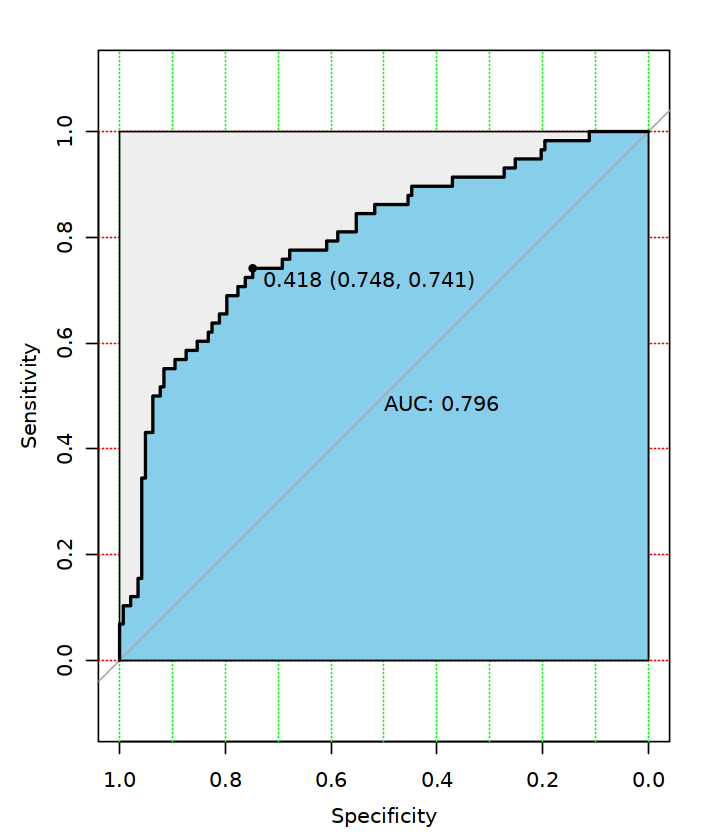

In [100]:
roc_curve <- pROC::roc(as.numeric(fold_test$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")